#**Midterm Project**
Contributors: Kaisar Dauletbek, Ulanbek Kurmaniyazov


###**1) Linear Regression**

In [1]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import zero_one_loss, accuracy_score, mean_squared_error
import random
import numpy as np
from tqdm import tqdm
import math

%matplotlib inline 

In [21]:
# True decision function
def f(x):
    return 1.5*x - 10

#Plotting function
def plot(X, f_x, w_pocket, w_lin, n):
  xs = np.arange(0, n, 1)

  figsize = plt.figaspect(1)
  f, ax = plt.subplots(1, 1, figsize=figsize)
  true_line = ax.plot(X[:, 0], f_x, label='True Function')
  ax.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

  hypothesis_line_pocket = ax.plot(xs, (w_pocket[0]+w_pocket[1]*xs), c = 'r', label='Pocket PLA Hypothesis')
  hypothesis_line_lin = ax.plot(xs, (w_lin[0]+w_lin[1]*xs), c = 'g', label='Linreg Hypothesis')

  ax.set_ylabel(r"$y$", fontsize=15, c = 'b')
  ax.set_xlabel(r"$x$", fontsize=15, c = 'b')
  ax.set_title('Data set size = %s'%n, fontsize=20, c = 'b')
  ax.axis('tight')

  legend_x = 2.0
  legend_y = 0.5
  ax.legend(['True Function', 'Pocket PLA Hypothesis', 'Linreg Hypothesis', 
            '1 labels', '0 labels'], 
            loc='center right', bbox_to_anchor=(legend_x, legend_y))

  ax.set_ylim(bottom=0, top=100)
  plt.show()

#data generating function
def generate_data(n, d):
  X = np.random.randint(100 ,size = (n,d))
  y = []
  f_x = []
  for i in range(n):
      f_x.append(f(X[i][0]))
      if X[i][1] >= f(X[i][0]):
          y.append(1)
      else:
          y.append(0)

  #making dataset linearly non-separable
  for i in range(n//10):
      ind = random.randint(0,n-1)
      if y[ind] == 1:
        y[ind] = 0
      else:
        y[ind] = 1
  
  return X, y, f_x

# the algorithm for pocket PLA, which takes the training set and labels as arguments
def pocket_pla(X, y):
  lr = 0.1  # a learning rate for weight update
  w = np.zeros(d).reshape(2,1)  # initializing a zero-vector of weights
  n_iter = 1000  # number of training iterations
  min_error = 10000  # a maximal bound for the error to initialize the pocket algorithm
  for epoch in range(0, n_iter):
    error = 0
    for i in range(len(X)):      
      X_i = X[i].reshape(-1, X.shape[1])
      y_i = y[i]
      prediction = np.dot(X_i, w)[0][0]  # prediction -- w.T * X[i]
      if y_i == 1 and prediction <= 0:  # weight update rule
        error += 1
        w = w + lr * X_i.T
      elif y_i == -1 and prediction >= 0:  # weight update rule
        error += 1
        w = w - lr * X_i.T

    if error<min_error:  #pocket algorithm -- saving w if the error is smaller than for previous w
      min_error = error
      w_pocket = w

  w_pocket = w_pocket / np.linalg.norm(w_pocket)  #normalizing the final weight vector
  return w_pocket

In [22]:
n = 100
n_test = 1000
#dimensionality
d = 2 
#generating training data with n = 100
X, y, f_x = generate_data(n,d)
#generating test data with n_test = 1000
X_test, y_test, f_x_test = generate_data(n_test,d)


In [23]:
#training pocket pla
w_pocket = pocket_pla(X,y)
print("w pocket:")
print(w_pocket)

#training linreg
reg = LinearRegression().fit(X, y)
w_lin = reg.coef_.reshape(2,1)
print("w linreg:")
print(w_lin)


w pocket:
[[0.2903058 ]
 [0.95693393]]
w linreg:
[[-0.00977836]
 [ 0.00435232]]


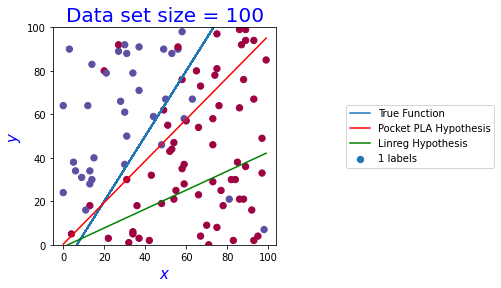

In [24]:
plot(X, f_x, w_pocket, w_lin*100, 100)

In [25]:
#@title A plot of decision rule lines for pocket PLA and linear regression.

In [26]:
#a funtion to compute the zero-one losses
def zero_one_loss_for_w(w_pocket, w_lin, X_test, y_test):
  y_pred_pocket = []
  y_pred_lin = []
  y_true = y_test
  for x in X_test:
    prediction_pocket = np.dot(w_pocket.T, x)
    prediction_lin = np.dot(w_lin.T, x)
    if prediction_lin >= 0:
      y_pred_lin.append(1)
    else:
      y_pred_lin.append(0)

    if prediction_pocket >= 0:
      y_pred_pocket.append(1)
    else:
      y_pred_pocket.append(0)

  pocket_loss = zero_one_loss(y_true, y_pred_pocket)
  lin_loss = zero_one_loss(y_true, y_pred_lin)

  return pocket_loss, lin_loss

pocket_loss, lin_loss = zero_one_loss_for_w(w_pocket, w_lin, X_test, y_test)
print("Pocket PLA Error: "+ str(pocket_loss))
print("Linreg Error: "+ str(lin_loss))

Pocket PLA Error: 0.594
Linreg Error: 0.239


In [27]:
E_w_pocket = []
E_w_lin = []
T = np.arange(0, 100, 1)
for t in tqdm(T):
  n = 100
  n_test = 1000
  #dimensionality
  d = 2 
  #generating training data with n = 100
  X, y, f_x = generate_data(n,d)
  #generating test data with n_test = 1000
  X_test, y_test, f_x_test = generate_data(n_test,d)

  #training pocket pla
  w_pocket = pocket_pla(X,y)
  #training linreg
  reg = LinearRegression().fit(X, y)
  w_lin = reg.coef_.reshape(2,1)

  pocket_loss, lin_loss = zero_one_loss_for_w(w_pocket, w_lin, X_test, y_test)
  E_w_pocket.append(pocket_loss)
  E_w_lin.append(lin_loss)


100%|██████████| 100/100 [00:43<00:00,  2.28it/s]


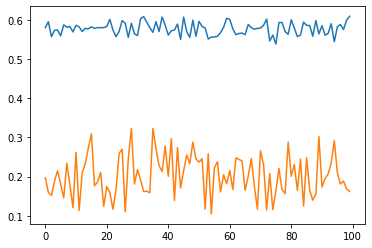

In [28]:
#blue - pocket error, orange - linreg error
plt.plot(T, E_w_pocket)
plt.plot(T, E_w_lin)

As we can see, linear regression outperforms the pocket PLA in our case. This may happen due to the fact that we use a fairly basic weight update rule for pocket PLA, while linear regression algorithm minimizes the objective function (the 2-norm), which yields much more precise results.

###**2) Logistic Regression**

In [11]:
#gradient function
def gradient(x, y, w):
  return -y*x/(1+math.exp(y*np.dot(w, x)))

#sign function
def sign(z):
  if z>0:
    return 1
  else:
    return -1

#error function
def error_f(X, y, w):
  a, b = X.shape
  sum = 0
  for i in range(a):
    sum += math.log(1+math.exp(-y[i]*(np.dot(w, X[i]))))
  return sum/a

#sgd algorithm
def stochastic_gradient_descent(X, y, lr, T):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #generating train and test splits
  a, b = X_train.shape
  w = np.zeros(b) #initializing zero vector of size of columns of training data
  
  E_train = []
  E_test = []

  for i in range(T):
    n = random.randint(0, a-1) #picking a random row index for sgd
    w = w - lr * gradient(X_train[n], y_train[n], w)  #updating w based on gradient

    E_train.append(error_f(X_train, y_train, w))  #train errors per epoch
    E_test.append(error_f(X_test, y_test, w))  #testt errors per epoch

  return w, E_train, E_test

In [12]:
#downloading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
#suggested learning rate and number of training epochs
lr = 0.001 
T = 2000

#finding datapoints with labels 0
y0 = []
for i in y:
    if i == 0:
        y0.append(1)
    else:
        y0.append(-1)
#calculating weight vector for label 0
w0, E0_train, E0_test = stochastic_gradient_descent(X, y0, lr, T)

#finding datapoints with labels 1
y1 = []
for i in y:
    if i == 1:
        y1.append(1)
    else:
        y1.append(-1)
#calculating weight vector for label 1
w1, E1_train, E1_test = stochastic_gradient_descent(X, y1, lr, T)

#finding datapoints with labels 2
y2 = []
for i in y:
    if i == 2:
        y2.append(1)
    else:
        y2.append(-1)
#calculating weight vector for label 2
w2, E2_train, E2_test = stochastic_gradient_descent(X, y2, lr, T)

print(w0, w1, w2)

[ 0.11460551  0.41173386 -0.6937665  -0.31685704] [-0.09218403 -0.22716962  0.14149592  0.01084661] [-0.27238073 -0.36063127  0.46029309  0.26803991]


Text(0.5, 1.0, 'First class vs All')

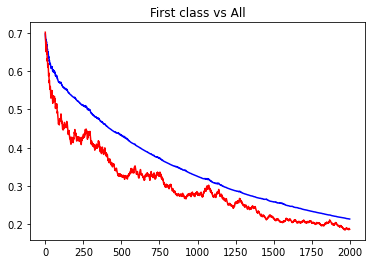

In [14]:
plt.plot(E0_train, c = 'b')
plt.plot(E0_test, c = 'r')
plt.title("First class vs All")

Text(0.5, 1.0, 'Second class vs All')

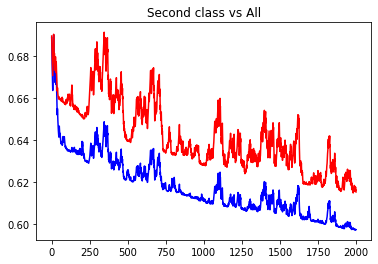

In [15]:
plt.plot(E1_train, c = 'b')
plt.plot(E1_test, c = 'r')
plt.title("Second class vs All")

Text(0.5, 1.0, 'Third class vs All')

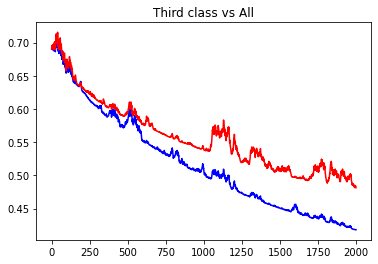

In [16]:
plt.plot(E2_train, c = 'b')
plt.plot(E2_test, c = 'r')
plt.title("Third class vs All")

In [17]:
#function g which returns the label for the datapoint
def g(x, w0, w1, w2):
  prediction_w0 = np.dot(x, w0)
  prediction_w1 = np.dot(x, w1)
  prediction_w2 = np.dot(x, w2)

  if prediction_w0 > prediction_w1 and prediction_w0 > prediction_w2:
    return 0
  elif prediction_w1 > prediction_w0 and prediction_w1 > prediction_w2:
    return 1
  else:
    return 2

In [18]:
predictions_test = []
#testing the decision function on testing split
for x in X_test:
  prediction_g = g(x, w0, w1, w2)
  predictions_test.append(prediction_g)

error = 0
#calculating test error rate
for i in range(len(y_test)):
  if predictions_test[i] == y_test[i]:
    pass
  else:
    error += 1
  
print("Test error rate: " + str(error/len(y_test)))

Test error rate: 0.2


As we can see, the OVA algorithm achieves a decent test error rate, which shows that OVA classification is beneficial for IRIS dataset

###**3) Practical Design of Learning Algorithm**

In [33]:
#Downloading the digits dataset
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [37]:
#cross validation function for linear regression
def cross_val_linreg(X, y, n):
  m = y.shape[0]
  d_size = m//n
  errors = []

  for i in range(n):
    #generating a mask
    test_mask = np.zeros(m, dtype = bool)
    test_mask[i*d_size : (i+1)*d_size] = True
    #masking the dataset
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]

    #running linreg on masked dataset
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    predictions = linreg.predict(X_test)
    errors.append(mean_squared_error(y_test, predictions))
    
  return np.mean(errors)

#cross validation function for logistic regression
def cross_val_logreg(X, y, n):
  m = y.shape[0]
  d_size = m//n
  errors = []

  for i in range(n):
    #generating a mask
    test_mask = np.zeros(m, dtype = bool)
    test_mask[i*d_size : (i+1)*d_size] = True
    #masking the dataset
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]

    #running logreg on masked dataset
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train, y_train)
    predictions = logreg.predict(X_test)
    errors.append(accuracy_score(y_test, predictions))
    
  return np.mean(errors)

In [ ]:
print("5-fold cross-validated linreg and logreg errors: ", str(cross_val_linreg(X, y, 5)) + ', ' + str(cross_val_logreg(X, y, 5)))

print("10-fold cross-validated linreg and logreg errors: ", str(cross_val_linreg(X, y, 10)) + ', ' + str(cross_val_logreg(X, y, 10)))

print("20-fold cross-validated linreg and logreg errors: ", str(cross_val_linreg(X, y, 20)) + ', ' + str(cross_val_logreg(X, y, 20)))
print('\n\n')
a = y.shape[0]
print("LOOCV linreg error: ", str(cross_val_linreg(X, y, a)))
print("LOOCV logreg error: ", str(cross_val_logreg(X, y, a)))

5-fold cross-validated linreg and logreg errors:  4.047506983313386, 0.9181058495821727
10-fold cross-validated linreg and logreg errors:  3.8342898970964105, 0.9256983240223464
20-fold cross-validated linreg and logreg errors:  3.6972620028083027, 0.94438202247191



LOOCV linreg error:  3.5285778378594754


As we can see, the logreg generally outperforms linreg, as it is more suited for the classification task. The difference in error values is due to the fact that we present a normalized rate of error for logreg, and average mean squared error for linreg. Also, tthe LOOCV for logreg is a computationally expensive process, but can be verified with the code with enough wait.

In [ ]:
from sklearn.model_selection import GridSearchCV
#initializing logreg
lg = LogisticRegression()
#initializing parameters
parameters = {'C' : [100, 10, 1.0, 0.1, 0.01], 'solver' : ['newton-cg', 'liblinear']} 
#chose the newton-cg and liblinear solvers due to convergence issues

#initializing grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator = lg, param_grid = parameters, scoring = 'accuracy', cv = 10)
#calculating predictions from grid search
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.938774 using {'C': 0.01, 'solver': 'newton-cg'}
0.923191 (0.024770) with: {'C': 100, 'solver': 'newton-cg'}
0.914299 (0.040613) with: {'C': 100, 'solver': 'liblinear'}
0.922076 (0.026258) with: {'C': 10, 'solver': 'newton-cg'}
0.919308 (0.040168) with: {'C': 10, 'solver': 'liblinear'}
0.928200 (0.026433) with: {'C': 1.0, 'solver': 'newton-cg'}
0.925975 (0.039070) with: {'C': 1.0, 'solver': 'liblinear'}
0.928752 (0.029358) with: {'C': 0.1, 'solver': 'newton-cg'}
0.932647 (0.032342) with: {'C': 0.1, 'solver': 'liblinear'}
0.938774 (0.031688) with: {'C': 0.01, 'solver': 'newton-cg'}
0.935422 (0.030388) with: {'C': 0.01, 'solver': 'liblinear'}


4) Kaggle Competition: Fashion MNIST

Kaggle submission link: https://www.kaggle.com/ulanbekkurmaniyazov/robt407-kurmaniyazov-dauletbek